In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.dropna(subset='bmi', inplace=True)

In [6]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.drop(['id'], axis=1, inplace=True)

<Axes: >

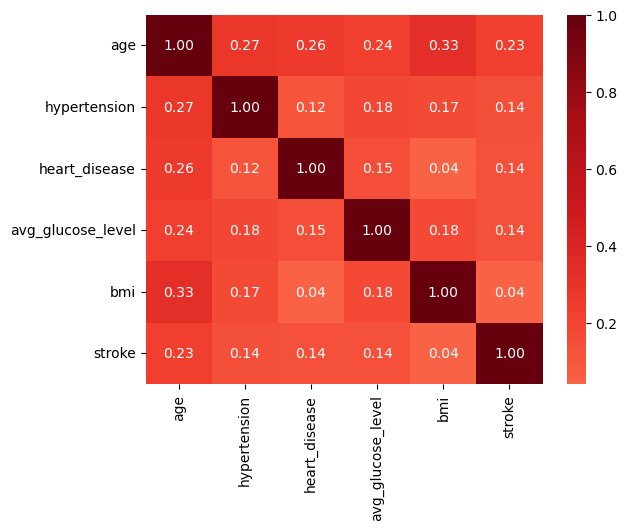

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Reds', center=0)

In [9]:
df.corr(numeric_only=True)['stroke']

age                  0.232331
hypertension         0.142515
heart_disease        0.137938
avg_glucose_level    0.138936
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

### Transform non-numeric data

In [10]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [11]:
features = df.select_dtypes(include='object').columns.tolist()

In [12]:
features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
features_encoded = encoder.fit_transform(df[features].values)

In [14]:
features_encoded.shape

(4909, 16)

In [15]:
data = pd.concat([df,
                 pd.DataFrame(features_encoded, columns=encoder.get_feature_names_out(features))], axis=1).drop(features, axis=1)

In [16]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.6,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,80.0,0.0,1.0,105.92,32.5,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49.0,0.0,0.0,171.23,34.4,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,79.0,1.0,0.0,174.12,24.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,81.0,0.0,0.0,186.21,29.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
data.isna().sum()

age                               192
hypertension                      192
heart_disease                     192
avg_glucose_level                 192
bmi                               192
stroke                            192
gender_Female                     192
gender_Male                       192
gender_Other                      192
ever_married_No                   192
ever_married_Yes                  192
work_type_Govt_job                192
work_type_Never_worked            192
work_type_Private                 192
work_type_Self-employed           192
work_type_children                192
Residence_type_Rural              192
Residence_type_Urban              192
smoking_status_Unknown            192
smoking_status_formerly smoked    192
smoking_status_never smoked       192
smoking_status_smokes             192
dtype: int64

In [18]:
data.dropna(axis=0, inplace=True)

In [19]:
X=data.drop(['stroke'], axis=1)
y= data.stroke

In [20]:
y.value_counts()

stroke
0.0    4508
1.0     209
Name: count, dtype: int64

<Axes: ylabel='count'>

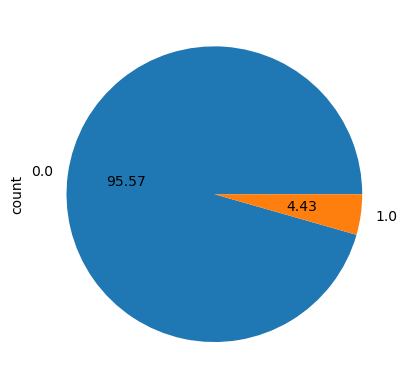

In [21]:
y.value_counts().plot.pie(autopct='%.2f')

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
res = RandomUnderSampler()

X_res, y_res = res.fit_resample(X, y)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=42)

In [26]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5, dual='auto'))

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual='auto', random_state=0, tol=1e-05))])

In [27]:
predy = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
accuracy_score(y_test, predy)

0.7857142857142857

In [30]:
print(classification_report(y_test, predy))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        42
         1.0       0.75      0.86      0.80        42

    accuracy                           0.79        84
   macro avg       0.79      0.79      0.78        84
weighted avg       0.79      0.79      0.78        84



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 589.3+ KB


In [32]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [33]:
new_input = pd.DataFrame({'gender': ['Male'],
                          'age': [56],
                          'hypertension':[1],
                          'heart_disease':[0],
                          'ever_married':['Yes'],
                          'work_type': ['Private'],
                          'Residence_type': ['Urban'],
                          'avg_glucose_level': [150],
                          'bmi': [120],
                          'smoking_status': ['smokes']
                          
    
})

new_input

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,56,1,0,Yes,Private,Urban,150,120,smokes


In [34]:
trans_input = encoder.transform(new_input[features].values)

In [35]:
new_input = pd.concat([new_input,
                 pd.DataFrame(trans_input, columns=encoder.get_feature_names_out(features))], axis=1).drop(features, axis=1)

In [36]:
pred = model.predict(new_input)
pred

array([1.])

In [37]:
import pickle

In [38]:
data = {'model': model, 'encoder':encoder}

with open('pickle_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [39]:
df.Residence_type.unique().tolist()

['Urban', 'Rural']